# Random Forest Regressor

In [120]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor  

from datetime import datetime as dt, date
import datetime

from bs4 import BeautifulSoup

In [106]:
weather_dataframe = pd.read_csv("Semenyih-weather-data.csv", index_col='datetime')

weather_dataframe.tail(50)


,name,sunrise,sunset,temp,tempmax,tempmin,feelslike,humidity,windspeed,cloudcover,visibility,precipprob
datetime,,,,,,,,,,,,
7/3/2024,Semenyih,2024-03-07T07:21:20,2024-03-07T19:25:56,28.20,32.40,26.00,32.40,85.9,15.80,57.9,9.1,0.0
8/3/2024,Semenyih,2024-03-08T07:21:00,2024-03-08T19:25:46,26.60,30.00,24.20,28.00,89.9,10.50,57.9,8.3,100.0
9/3/2024,Semenyih,2024-03-09T07:20:40,2024-03-09T19:25:35,28.20,34.30,23.90,31.40,80.7,10.70,52.6,9.8,100.0
10/3/2024,Semenyih,2024-03-10T07:20:20,2024-03-10T19:25:25,28.70,32.70,25.10,32.60,77.1,12.90,54.8,9.9,100.0
11/3/2024,Semenyih,2024-03-11T07:20:00,2024-03-11T19:25:14,29.00,33.80,26.00,32.60,73.8,10.60,51.8,9.6,0.0
12/3/2024,Semenyih,2024-03-12T07:19:39,2024-03-12T19:25:02,29.00,33.30,25.10,33.10,76.0,9.90,51.8,9.1,100.0
13/3/2024,Semenyih,2024-03-13T07:19:18,2024-03-13T19:24:51,29.10,34.00,24.60,33.00,76.3,11.70,55.3,8.9,100.0
14/3/2024,Semenyih,2024-03-14T07:18:56,2024-03-14T19:24:39,29.20,34.50,24.60,32.90,72.9,13.80,52.5,9.3,100.0
15/3/2024,Semenyih,2024-03-15T07:18:34,2024-03-15T19:24:27,29.10,33.30,26.00,33.80,77.5,10.70,54.8,8.8,100.0


In [107]:
weather_dataframe.columns

Index(['name', 'sunrise', 'sunset', 'temp', 'tempmax', 'tempmin', 'feelslike',
       'humidity', 'windspeed', 'cloudcover', 'visibility', 'precipprob'],
      dtype='object')

In [108]:
weather_dataframe.shape

(846, 12)

In [109]:
weather_dataframe.describe()

,temp,tempmax,tempmin,feelslike,humidity,windspeed,cloudcover,visibility,precipprob
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,27.862695,32.224232,24.809929,30.735839,80.612648,12.219031,47.309456,9.310402,67.365248
std,1.070674,1.580421,0.917864,2.078642,5.149295,3.050412,7.428272,0.585474,46.905017
min,24.400000,25.300000,22.200000,24.400000,57.000000,1.190000,25.200000,6.700000,0.000000
25%,27.100000,31.300000,24.200000,29.300000,77.400000,10.300000,41.000000,9.000000,0.000000
50%,27.900000,32.300000,24.900000,30.800000,80.700000,11.800000,47.700000,9.400000,100.000000
75%,28.600000,33.300000,25.300000,32.100000,84.200000,13.875000,52.900000,9.700000,100.000000
max,34.030000,36.000000,30.820000,41.030000,94.000000,24.100000,100.000000,10.600000,100.000000


In [110]:
weather_dataframe.isnull().any()

name          False
sunrise       False
sunset        False
temp          False
tempmax       False
tempmin       False
feelslike     False
humidity      False
windspeed     False
cloudcover    False
visibility    False
precipprob    False
dtype: bool

In [111]:
weather_dataframe_fyp = weather_dataframe.loc[:, ['sunrise', 'sunset', 'temp', 'tempmax', 'tempmin', 'feelslike','humidity', 'windspeed', 'cloudcover','visibility', 'precipprob']]

weather_dataframe_fyp['sunrise'] = weather_dataframe_fyp['sunrise'].str.split('T').str[1]
weather_dataframe_fyp['sunset'] = weather_dataframe_fyp['sunset'].str.split('T').str[1]

weather_dataframe_fyp['sunrise'] = pd.to_timedelta(weather_dataframe_fyp['sunrise']).dt.total_seconds()
weather_dataframe_fyp['sunset'] = pd.to_timedelta(weather_dataframe_fyp['sunset']).dt.total_seconds()

weather_dataframe_fyp.tail(50)

,sunrise,sunset,temp,tempmax,tempmin,feelslike,humidity,windspeed,cloudcover,visibility,precipprob
datetime,,,,,,,,,,,
7/3/2024,26480.0,69956.0,28.20,32.40,26.00,32.40,85.9,15.80,57.9,9.1,0.0
8/3/2024,26460.0,69946.0,26.60,30.00,24.20,28.00,89.9,10.50,57.9,8.3,100.0
9/3/2024,26440.0,69935.0,28.20,34.30,23.90,31.40,80.7,10.70,52.6,9.8,100.0
10/3/2024,26420.0,69925.0,28.70,32.70,25.10,32.60,77.1,12.90,54.8,9.9,100.0
11/3/2024,26400.0,69914.0,29.00,33.80,26.00,32.60,73.8,10.60,51.8,9.6,0.0
12/3/2024,26379.0,69902.0,29.00,33.30,25.10,33.10,76.0,9.90,51.8,9.1,100.0
13/3/2024,26358.0,69891.0,29.10,34.00,24.60,33.00,76.3,11.70,55.3,8.9,100.0
14/3/2024,26336.0,69879.0,29.20,34.50,24.60,32.90,72.9,13.80,52.5,9.3,100.0
15/3/2024,26314.0,69867.0,29.10,33.30,26.00,33.80,77.5,10.70,54.8,8.8,100.0


array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

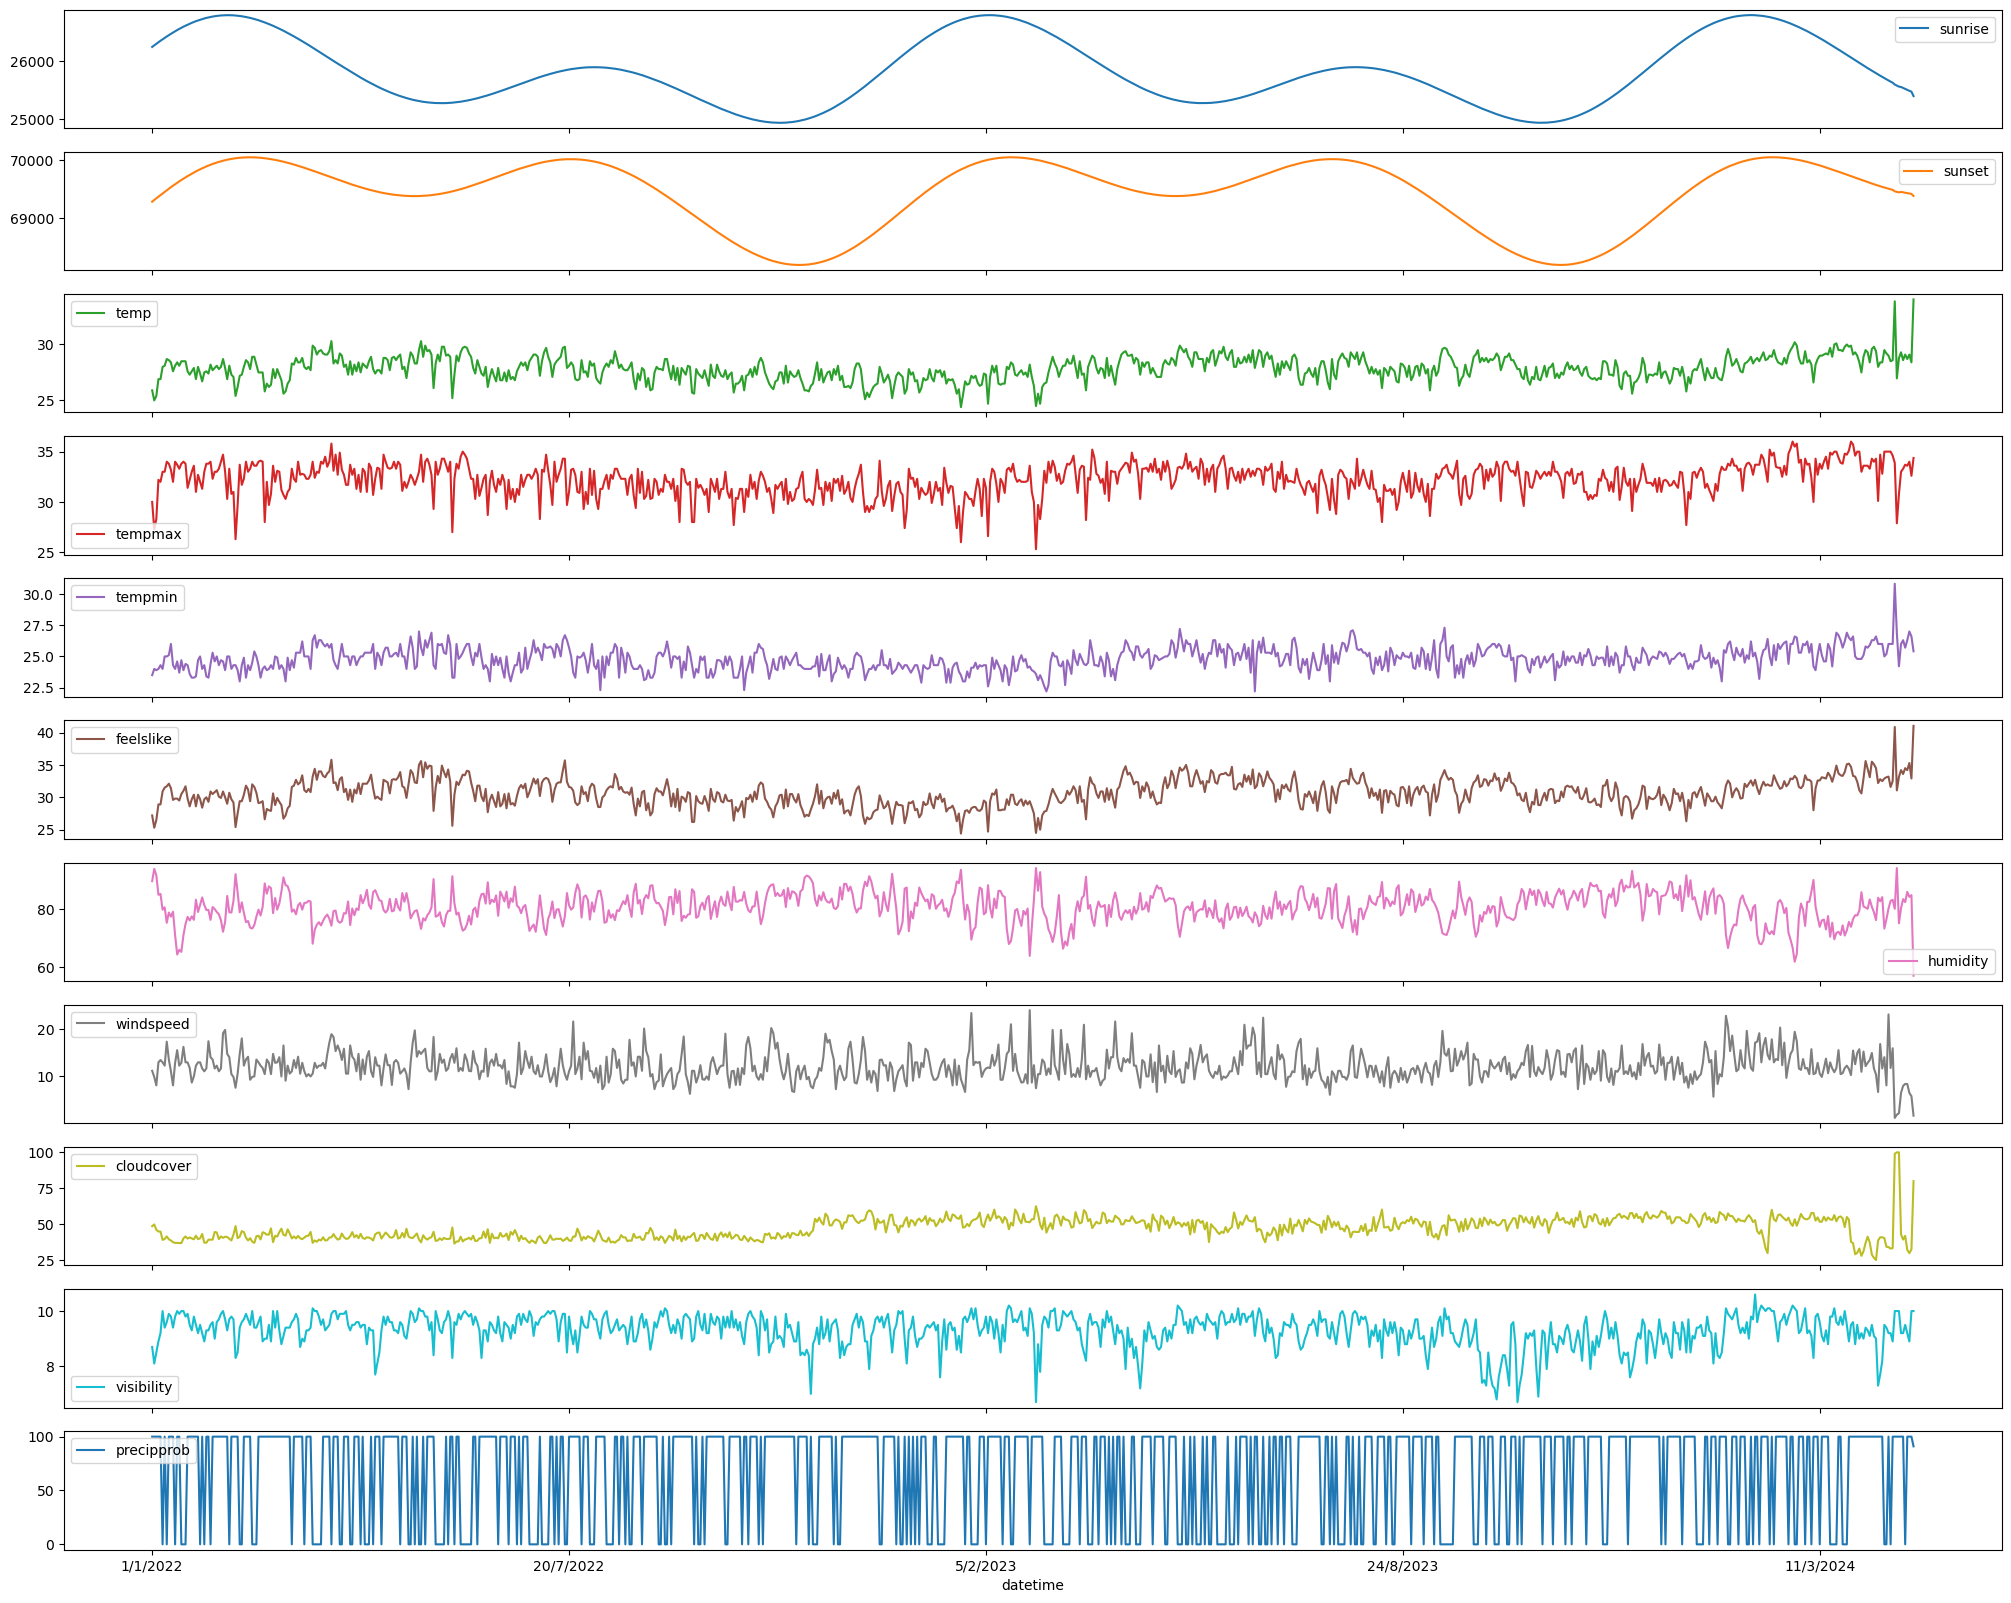

In [112]:
weather_dataframe_fyp.plot(subplots=True, figsize=(25, 20))

In [113]:
weather_dataframe_result = weather_dataframe_fyp.copy()
weather_dataframe_pop = weather_dataframe_fyp.copy()

In [114]:
weather_y_sunrise = weather_dataframe_pop.pop('sunrise')
weather_y_sunset = weather_dataframe_pop.pop('sunset')
weather_y_temp = weather_dataframe_pop.pop('temp')
weather_y_tempmax = weather_dataframe_pop.pop('tempmax')
weather_y_tempmin = weather_dataframe_pop.pop('tempmin')
weather_y_feelslike = weather_dataframe_pop.pop('feelslike')
weather_y_humidity = weather_dataframe_pop.pop('humidity')
weather_y_windspeed = weather_dataframe_pop.pop('windspeed')
weather_y_cloudcover = weather_dataframe_pop.pop('cloudcover')
weather_y_visibility = weather_dataframe_pop.pop('visibility')
weather_y_precipprob = weather_dataframe_pop.pop('precipprob')

weather_x = weather_dataframe_fyp

In [115]:
train_x_sunrise, test_x_sunrise, train_y_sunrise, test_y_sunrise = train_test_split(weather_x, weather_y_sunrise, test_size=0.2, random_state=4)

train_x_sunset, test_x_sunset, train_y_sunset, test_y_sunset = train_test_split(weather_x, weather_y_sunset, test_size=0.2, random_state=4)

train_x_temp, test_x_temp, train_y_temp, test_y_temp = train_test_split(weather_x, weather_y_temp, test_size=0.2, random_state=4)

train_x_tempmax, test_x_tempmax, train_y_tempmax, test_y_tempmax = train_test_split(weather_x, weather_y_tempmax, test_size=0.2, random_state=4)

train_x_tempmin, test_x_tempmin, train_y_tempmin, test_y_tempmin = train_test_split(weather_x, weather_y_tempmin, test_size=0.2, random_state=4)

train_x_feelslike, test_x_feelslike, train_y_feelslike, test_y_feelslike = train_test_split(weather_x, weather_y_feelslike, test_size=0.2, random_state=4)

train_x_humidity, test_x_humidity, train_y_humidity, test_y_humidity = train_test_split(weather_x, weather_y_humidity, test_size=0.2, random_state=4)

train_x_windspeed, test_x_windspeed, train_y_windspeed, test_y_windspeed = train_test_split(weather_x, weather_y_windspeed, test_size=0.2, random_state=4)

train_x_cloudcover, test_x_cloudcover, train_y_cloudcover, test_y_cloudcover = train_test_split(weather_x, weather_y_cloudcover, test_size=0.2, random_state=4)

train_x_visibility, test_x_visibility, train_y_visibility, test_y_visibility = train_test_split(weather_x, weather_y_visibility, test_size=0.2, random_state=4)

train_x_precipprob, test_x_precipprob, train_y_precipprob, test_y_precipprob = train_test_split(weather_x, weather_y_precipprob, test_size=0.2, random_state=4)

In [116]:
print(train_x_tempmax)
print(train_y_tempmax)



            sunrise   sunset  temp  tempmax  tempmin  feelslike  humidity  \
datetime                                                                    
28/2/2023   26615.0  70019.0  26.3     30.0     23.8       27.5      83.0   
1/3/2023    26600.0  70012.0  24.5     25.3     23.6       24.5      94.0   
11/5/2023   25306.0  69383.0  29.3     33.7     25.4       34.4      79.1   
17/3/2024   26270.0  69843.0  28.9     34.7     24.2       32.4      75.2   
20/4/2024   25542.0  69444.0  28.6     33.3     26.3       33.6      83.3   
...             ...      ...   ...      ...      ...        ...       ...   
27/12/2022  26101.0  69126.0  27.1     30.7     24.0       28.7      75.5   
11/12/2023  25623.0  68657.0  27.2     32.3     25.0       29.3      87.5   
16/3/2023   26309.0  69864.0  28.7     33.8     24.7       31.0      67.4   
24/6/2022   25577.0  69828.0  26.8     30.0     24.3       28.7      87.6   
3/5/2022    25368.0  69382.0  27.0     31.4     24.0       29.9      85.4   

In [117]:
regression_sunrise = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=100)
regression_sunrise.fit(train_x_sunrise, train_y_sunrise)
prediction_sunrise = regression_sunrise.predict(test_x_sunrise)

regression_sunset = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=100)
regression_sunset.fit(train_x_sunset, train_y_sunset)
prediction_sunset = regression_sunset.predict(test_x_sunset)

regression_temp = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=100)
regression_temp.fit(train_x_temp, train_y_temp)
prediction_temp = regression_temp.predict(test_x_temp)

regression_tempmax = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=100)
regression_tempmax.fit(train_x_tempmax, train_y_tempmax)
prediction_tempmax = regression_tempmax.predict(test_x_tempmax)

regression_tempmin = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=100)
regression_tempmin.fit(train_x_tempmin, train_y_tempmin)
prediction_tempmin = regression_tempmin.predict(test_x_tempmin)

regression_feelslike = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=100)
regression_feelslike.fit(train_x_tempmax, train_y_feelslike)
prediction_feelslike = regression_feelslike.predict(test_x_feelslike)

regression_humidity = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=100)
regression_humidity.fit(train_x_humidity, train_y_humidity)
prediction_humidity = regression_humidity.predict(test_x_humidity)

regression_windspeed = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=100)
regression_windspeed.fit(train_x_windspeed, train_y_windspeed)
prediction_windspeed = regression_windspeed.predict(test_x_windspeed)

regression_cloudcover = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=100)
regression_cloudcover.fit(train_x_cloudcover, train_y_cloudcover)
prediction_cloudcover = regression_cloudcover.predict(test_x_cloudcover)

regression_visibility = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=100)
regression_visibility.fit(train_x_visibility, train_y_visibility)
prediction_visibility = regression_visibility.predict(test_x_visibility)

regression_precipprob = RandomForestRegressor(max_depth=100, random_state=0, n_estimators=100)
regression_precipprob.fit(train_x_precipprob, train_y_precipprob)
prediction_precipprob = regression_precipprob.predict(test_x_precipprob)

In [124]:
today = date.today() 

date_str = dt.strptime(str(today), '%Y-%m-%d').strftime('%d %B %Y')

def seconds_to_time(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    return "{:02d}:{:02d}:{:02d}".format(int(hours), int(minutes), int(seconds))

if today not in weather_dataframe_result.index:
    last_row = weather_dataframe_fyp.iloc[-1:]
    
    prediction_sunrise = regression_sunrise.predict(last_row)
    prediction_sunset = regression_sunset.predict(last_row)
    prediction_temp = regression_temp.predict(last_row)
    prediction_tempmax = regression_tempmax.predict(last_row)
    prediction_tempmin = regression_tempmin.predict(last_row)
    prediction_feelslike = regression_feelslike.predict(last_row)
    prediction_humidity = regression_humidity.predict(last_row)
    prediction_windspeed = regression_windspeed.predict(last_row)
    prediction_cloudcover = regression_cloudcover.predict(last_row)
    prediction_visibility = regression_visibility.predict(last_row)
    prediction_precipprob = regression_precipprob.predict(last_row)
    
    date_for_today = {'sunrise': seconds_to_time(prediction_sunrise), 'sunset': seconds_to_time(prediction_sunset), 'temp': prediction_temp, 'tempmax': prediction_tempmax, 'tempmin': prediction_tempmin, 'feelslike': prediction_feelslike, 'humidity': prediction_humidity, 'windspeed': prediction_windspeed, 'cloudcover': prediction_cloudcover, 'visibility': prediction_visibility, 'precipprob': prediction_precipprob}
    
    weather_dataframe_result['sunrise'] = weather_dataframe_result['sunrise'].apply(seconds_to_time)
    weather_dataframe_result['sunset'] = weather_dataframe_result['sunset'].apply(seconds_to_time)

    new_data = pd.DataFrame(date_for_today, index=[today])
    
    weather_dataframe_result = weather_dataframe_result.append(new_data)

print(weather_dataframe_result.tail(5))


data_html = {
    'sunrise': seconds_to_time(prediction_sunrise[0]),
    'sunset': seconds_to_time(prediction_sunset[0]),
    'temperature': format(prediction_temp[0], '.2f'),
    'feels-like': format(prediction_feelslike[0], '.2f'), 
    'min-temp': format(prediction_tempmin[0], '.2f'),
    'max-temp': format(prediction_tempmax[0], '.2f'),
    'wind-speed': format(prediction_windspeed[0], '.2f') + 'm/s',
    'cloudiness': format(prediction_cloudcover[0], '.2f') + '%',
    'humidity': format(prediction_humidity[0], '.2f') + '%',
    'visibility': format(prediction_visibility[0], '.2f') + 'km'

}

data_html['prediction-date'] = date_str

with open('AI_prediction.html', 'r') as file:
    html = file.read()

# Parse the HTML
soup = BeautifulSoup(html, 'html.parser')

# Find the elements by id and replace their content with the actual data
for key, value in data_html.items():
    if key == 'prediction-date':
        # Find the element by class and replace its content with the actual data
        element = soup.find(class_=f'{key}')
    else:
        # Find the element by id and replace its content with the actual data
        element = soup.find(id=f'{key}-value-predict')
    if element:
        element.string = str(value)
# Write the result back to the HTML file
with open('AI_prediction.html', 'w') as file:
    file.write(str(soup))




             sunrise    sunset     temp  tempmax  tempmin  feelslike  \
22/4/2024   07:05:09  19:17:10  28.7000  33.6000  26.3000    34.2000   
23/4/2024   07:04:53  19:17:03  29.1000  34.0000  27.0000    35.3000   
24/4/2024   07:04:38  19:16:57  28.4000  32.6000  26.6000    32.9000   
29/4/2024   07:03:22  19:16:21  34.0300  34.3700  25.4100    41.0300   
2024-04-29  07:03:22  19:16:20  32.6089  34.3551  25.4063    39.0139   

            humidity  windspeed  cloudcover  visibility  precipprob  
22/4/2024     85.800     8.4000      32.200         9.2      100.00  
23/4/2024     84.100     6.5000      30.000         8.9      100.00  
24/4/2024     84.700     5.8000      32.600        10.0      100.00  
29/4/2024     57.000     1.6600      80.000        10.0       91.00  
2024-04-29    59.629     2.4364      77.566        10.0       94.33  
